In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

In [171]:
# importing our dataset
df=pd.read_csv(r"/home/minhtran/Workspace/data-management-and-visualization/data/processed/master_olist_v2.csv")
df.head()

,order_id,product_id,product_category_name_english,review_score,seller_id,seller_state,price,freight_value,order_status,customer_id,customer_zip_code_prefix,geo_lat,geo_long,customer_state,payment_type,payment_value,shipping_limit_date,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,5.0,48436dade18ac8b2bce089ec2a041202,SP,58.90,13.29,delivered,3ce436f183e68e07877b285a838db11a,28013,-21.758076,-41.312633,RJ,credit_card,72.19,2017-09-19 09:45:35,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,4.0,dd7ddc04e1b6c2c614352b383efe2d36,SP,239.90,19.93,delivered,f6dd3ec061db4e3987629fe6b26e5cce,15775,-20.212393,-50.941471,SP,credit_card,259.83,2017-05-03 11:05:13,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,5.0,5b51032eddd242adc84c38acab88f23d,MG,199.00,17.87,delivered,6489ae5e4333f3693df5ad4372dab6d3,35661,-19.860439,-44.597972,MG,credit_card,216.87,2018-01-18 14:48:30,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumery,4.0,9d7a1d34a5052409006425275ba1c2b4,SP,12.99,12.79,delivered,d4eb9395c8c0431ee92fce09860c5a06,12952,-23.144923,-46.539830,SP,credit_card,25.78,2018-08-15 10:10:18,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,garden_tools,5.0,df560393f3a51e74553ab94004ba5c87,PR,199.90,18.14,delivered,58dbd0b2d70206bf40e62cd34e84d795,13226,-23.249008,-46.824961,SP,credit_card,218.04,2017-02-13 13:57:51,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   product_id                     112650 non-null  object 
 2   product_category_name_english  111023 non-null  object 
 3   review_score                   111708 non-null  float64
 4   seller_id                      112650 non-null  object 
 5   seller_state                   112650 non-null  object 
 6   price                          112650 non-null  float64
 7   freight_value                  112650 non-null  float64
 8   order_status                   112650 non-null  object 
 9   customer_id                    112650 non-null  object 
 10  customer_zip_code_prefix       112650 non-null  int64  
 11  geo_lat                        112348 non-null  float64
 12  geo_long                      

In [173]:
df.isnull().sum()

order_id                            0
product_id                          0
product_category_name_english    1627
review_score                      942
seller_id                           0
seller_state                        0
price                               0
freight_value                       0
order_status                        0
customer_id                         0
customer_zip_code_prefix            0
geo_lat                           302
geo_long                          302
customer_state                      0
payment_type                        3
payment_value                       3
shipping_limit_date                 0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
dtype: int64

In [174]:
# cleaning "product_category_name_english" columns
df['product_category_name_english']=df['product_category_name_english'].apply(lambda x: x.replace("\r","") if "\r"in str(x) else x)
df['product_category_name_english']=df['product_category_name_english'].replace(r"\N","UNKNOWN")

In [175]:
# Removing blank spaces
for i in df.select_dtypes(include="object").columns:
    df[i]=df[i].str.strip()

In [176]:
# changing column's datatype having date/time into dateime datatype 
# Format trong CSV là YYYY-MM-DD HH:MM:SS, không phải DD/MM/YYYY
date_col=['shipping_limit_date',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date']
for i in date_col:
    # Để pandas tự động nhận diện format hoặc dùng format đúng: "%Y-%m-%d %H:%M:%S"
    df[i]=pd.to_datetime(df[i], errors="coerce")

In [177]:
# sorting dataset according "Purchase Timestamp"
df=df.sort_values('order_purchase_timestamp')

In [178]:
# checking duplicates values and listing them together
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,order_id,product_id,product_category_name_english,review_score,seller_id,seller_state,price,freight_value,order_status,customer_id,customer_zip_code_prefix,geo_lat,geo_long,customer_state,payment_type,payment_value,shipping_limit_date,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
13,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,garden_tools,5.0,1f50f920176fa81dab994f9023523100,SP,49.90,13.37,delivered,2355af7c75e7c98b43a87b2a7f210dc5,6600,-23.532466,-46.903416,SP,boleto,126.54,2018-02-21 02:55:52,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06
14,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,garden_tools,5.0,1f50f920176fa81dab994f9023523100,SP,49.90,13.37,delivered,2355af7c75e7c98b43a87b2a7f210dc5,6600,-23.532466,-46.903416,SP,boleto,126.54,2018-02-21 02:55:52,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06
33,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,sports_leisure,NaN,a17f621c590ea0fab3d5d883e1630ec6,SP,21.33,15.10,delivered,2e45292979b9b2700ea09560eeb0f803,74663,-16.640414,-49.254632,GO,credit_card,109.29,2017-10-20 16:07:52,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06
32,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,sports_leisure,NaN,a17f621c590ea0fab3d5d883e1630ec6,SP,21.33,15.10,delivered,2e45292979b9b2700ea09560eeb0f803,74663,-16.640414,-49.254632,GO,credit_card,109.29,2017-10-20 16:07:52,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06
34,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,sports_leisure,NaN,a17f621c590ea0fab3d5d883e1630ec6,SP,21.33,15.10,delivered,2e45292979b9b2700ea09560eeb0f803,74663,-16.640414,-49.254632,GO,credit_card,109.29,2017-10-20 16:07:52,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,bee2e070c39f3dd2f6883a17a5f0da45,computers_accessories,5.0,4e922959ae960d389249c378d1c939f5,SP,180.00,48.14,delivered,6c1e92a209dbf868706caa831090941e,58075,-7.182497,-34.871457,PB,credit_card,456.28,2018-03-27 12:29:22,2018-03-17 12:11:45,2018-03-17 12:29:22,2018-03-21 19:22:25,2018-04-07 10:07:48,2018-04-19
112643,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,watches_gifts,4.0,b1fc4f64df5a0e8b6913ab38803c57a9,RJ,55.00,34.19,delivered,4d3abb73ceb86353aeadbe698aa9d5cb,56912,-7.995724,-38.294386,PE,boleto,356.76,2017-11-03 02:55:58,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27
112640,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,watches_gifts,4.0,b1fc4f64df5a0e8b6913ab38803c57a9,RJ,55.00,34.19,delivered,4d3abb73ceb86353aeadbe698aa9d5cb,56912,-7.995724,-38.294386,PE,boleto,356.76,2017-11-03 02:55:58,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27
112642,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,watches_gifts,4.0,b1fc4f64df5a0e8b6913ab38803c57a9,RJ,55.00,34.19,delivered,4d3abb73ceb86353aeadbe698aa9d5cb,56912,-7.995724,-38.294386,PE,boleto,356.76,2017-11-03 02:55:58,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27


In [179]:
# deleting dulicates values
df.drop_duplicates(inplace=True)

In [180]:
# now, no duplicate values present in dataset
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,order_id,product_id,product_category_name_english,review_score,seller_id,seller_state,price,freight_value,order_status,customer_id,customer_zip_code_prefix,geo_lat,geo_long,customer_state,payment_type,payment_value,shipping_limit_date,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [181]:
# Kiểm tra số dòng sẽ bị mất nếu drop null từ các cột này
print(f"Số dòng hiện tại: {len(df)}")
print(f"Số dòng có null trong 'order_approved_at': {df['order_approved_at'].isna().sum()}")
print(f"Số dòng có null trong 'order_delivered_carrier_date': {df['order_delivered_carrier_date'].isna().sum()}")
print(f"Số dòng có null trong 'order_delivered_customer_date': {df['order_delivered_customer_date'].isna().sum()}")
print(f"Số dòng có null trong CẢ 3 cột: {df[['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']].isna().all(axis=1).sum()}")
print(f"Số dòng sẽ bị xóa (có null ở BẤT KỲ cột nào): {df[['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']].isna().any(axis=1).sum()}")

# Xóa các dòng có null trong các cột quan trọng này
# LƯU Ý: Chỉ xóa nếu bạn chắc chắn cần các giá trị này cho phân tích
df.dropna(subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'],inplace=True)
print(f"Số dòng sau khi xóa: {len(df)}")

Số dòng hiện tại: 102425
Số dòng có null trong 'order_approved_at': 14
Số dòng có null trong 'order_delivered_carrier_date': 1028
Số dòng có null trong 'order_delivered_customer_date': 2230
Số dòng có null trong CẢ 3 cột: 0
Số dòng sẽ bị xóa (có null ở BẤT KỲ cột nào): 2245
Số dòng sau khi xóa: 100180


In [182]:
df.reset_index(drop=True,inplace=True)

In [183]:
# by how many days order got delay
df['delay_in_days']=(df['order_delivered_customer_date']-df['order_estimated_delivery_date']).dt.days


# Whether order got delayed or not 0 --> No delay and 1--> delayed
df['delayed']=df['delay_in_days'].apply(lambda x: 0 if x<=0 else 1)


# Creating payment range
bins = [0,100,200,300,400,500,600,50000]
labels = ['0-100', '100-200', '200-300', '300-400','400-500','500-600','more than 600']
df['payment_range'] = pd.cut(df['payment_value'], bins=bins, labels=labels, right=False)


# cutsomer type- First_time or Repeated 
customer_counts = df['customer_id'].value_counts()
df['customer_type'] = df['customer_id'].map(lambda x: 'Repeated' if customer_counts[x] > 1 else 'First-time')


# we create a column assuming that if order got delayed by 3 or more days
# and customer give review_score<=1 means our order got returned
# df['order_return']=df.apply(lambda x: 'yes' if (x['review_score']<=1 and x['delay_in_days']>=3) else 'no',axis=1)


# division of brazil states into five regions
North=['AC', 'AM', 'PA', 'RO', 'RR', 'TO']
North_east=['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
Central_West=['GO', 'MT', 'MS']
South_east=['ES', 'MG', 'RJ', 'SP']
South=['PR', 'RS', 'SC']
# assigning region of customers
df['cust_region']=df['customer_state'].apply(lambda x: 'North' if x in North
                                                 else 'North_east' if x in North_east
                                                 else 'Central_West' if x in Central_West
                                                 else 'South_east' if x in South_east
                                                 else 'South')


# days in which seller deliver the order to carrier
df['days_taken_seller_to_carrier']=(df['order_delivered_carrier_date']-df['order_approved_at']).dt.days


# estimated no. of days to deliver order to customer by carrier
df['estimated_days_for_delivery_by_carrier']=(df['order_estimated_delivery_date']-df['order_delivered_carrier_date']).dt.days


# actual no. of days taken by carrier for delivery
df['days_taken_by_carrier']=(df['order_delivered_customer_date']-df['order_delivered_carrier_date']).dt.days

In [184]:
# Re-arranging some columns
df=df[['order_id', 'product_id', 'product_category_name_english', 'review_score',
       'seller_id', 'seller_state', 'price', 'freight_value',
       'order_status', 'customer_id', 'customer_type', 'customer_zip_code_prefix',
       'geo_lat', 'geo_long', 'customer_state', 'cust_region', 'payment_type',
       'payment_value','payment_range', 'shipping_limit_date', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delayed', 'delay_in_days',
       'days_taken_seller_to_carrier','estimated_days_for_delivery_by_carrier', 'days_taken_by_carrier']]

In [185]:
df.head()

,order_id,product_id,product_category_name_english,review_score,seller_id,seller_state,price,freight_value,order_status,customer_id,customer_type,customer_zip_code_prefix,geo_lat,geo_long,customer_state,cust_region,payment_type,payment_value,payment_range,shipping_limit_date,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delay_in_days,days_taken_seller_to_carrier,estimated_days_for_delivery_by_carrier,days_taken_by_carrier
0,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,health_beauty,1.0,ecccfa2bb93b34a3bf033cc5d1dcdc69,PR,44.99,2.83,delivered,86dc2ffce2dfff336de2f386a786e574,First-time,14600,-20.581177,-47.858931,SP,South_east,NaN,NaN,NaN,2016-09-19 23:11:33,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,1,36,53,-35,1
1,3b697a20d9e427646d92567910af6d57,3ae08df6bcbfe23586dd431c40bddbb7,watches_gifts,4.0,522620dcb18a6b31cd7bdf73665113a9,PR,29.90,15.56,delivered,355077684019f7f60a031656bd7262b8,First-time,4106,-23.580204,-46.629783,SP,South_east,boleto,45.46,0-100,2016-10-21 16:27:20,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,0,-1,16,3,3
2,be5bc2f0da14d8071e2d45451ad119d9,fd7fd78fd3cbc1b0a6370a7909c0a629,sports_leisure,4.0,f09b760d23495ac9a7e00d29b769007c,SP,21.90,17.19,delivered,7ec40b22510fdbea1b08921dd39e63d8,First-time,98280,-28.295275,-53.499593,RS,South,boleto,39.09,0-100,2016-10-21 16:33:46,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,0,-11,15,16,6
3,65d1e226dfaeb8cdc42f665422522d14,9c7bdf67b06b419aefb93cfdfc96c55d,sports_leisure,1.0,ed49da7cadefc454d6a67de249eab240,SP,21.50,14.11,canceled,70fc57eeae292675927697fe03ad3ff5,First-time,22770,-22.938628,-43.360653,RJ,South_east,credit_card,35.61,0-100,2016-10-21 16:24:43,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,0,-17,21,30,13
4,a41c8759fbe7aab36ea07e038b2d4465,b72b39418216e944bb34e35f4d3ea8c7,sports_leisure,3.0,45d33f715e24d15a6ccf5c17b3a23e3c,SP,36.49,17.24,delivered,6f989332712d3222b6571b1cf5b835ce,First-time,90040,-30.043072,-51.211417,RS,South,boleto,53.73,0-100,2016-10-21 16:18:26,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,0,-26,20,34,8


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100180 entries, 0 to 100179
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   order_id                                100180 non-null  object        
 1   product_id                              100180 non-null  object        
 2   product_category_name_english           98760 non-null   object        
 3   review_score                            99487 non-null   float64       
 4   seller_id                               100180 non-null  object        
 5   seller_state                            100180 non-null  object        
 6   price                                   100180 non-null  float64       
 7   freight_value                           100180 non-null  float64       
 8   order_status                            100180 non-null  object        
 9   customer_id                          

In [187]:
df.select_dtypes(include=('int64','float64')).describe()

,review_score,price,freight_value,customer_zip_code_prefix,geo_lat,geo_long,payment_value,delayed,delay_in_days,days_taken_seller_to_carrier,estimated_days_for_delivery_by_carrier,days_taken_by_carrier
count,99487.000000,100180.000000,100180.000000,100180.000000,99907.000000,99907.000000,100179.000000,100180.000000,100180.000000,100180.000000,100180.000000,100180.000000
mean,4.126388,123.747455,20.069188,35139.199112,-21.210992,-46.193620,163.692399,0.066530,-11.982322,2.287862,20.210112,8.822929
std,1.310234,187.665431,15.781926,29831.955620,5.598446,4.056855,221.498958,0.249208,10.209934,3.531077,8.773731,8.729037
min,1.000000,0.850000,0.000000,1003.000000,-36.605374,-72.666706,9.590000,0.000000,-147.000000,-172.000000,-100.000000,-17.000000
25%,4.000000,40.000000,13.140000,11320.000000,-23.589020,-48.110471,63.085000,0.000000,-17.000000,0.000000,14.000000,4.000000
50%,5.000000,78.000000,16.320000,24416.000000,-22.926905,-46.632352,107.780000,0.000000,-13.000000,1.000000,20.000000,7.000000
75%,5.000000,139.000000,21.190000,59014.250000,-20.146615,-43.636571,181.705000,0.000000,-7.000000,3.000000,25.000000,11.000000
max,5.000000,6735.000000,409.680000,99980.000000,42.184003,-8.577855,13664.080000,1.000000,188.000000,125.000000,192.000000,205.000000


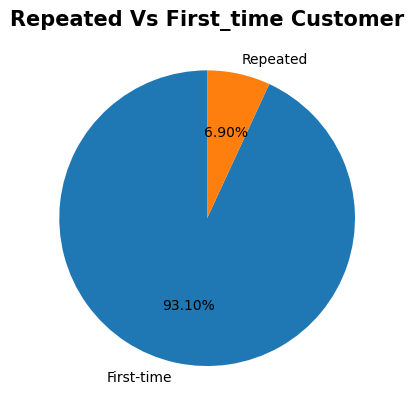

In [188]:
plt.title("Repeated Vs First_time Customer",fontdict={'fontsize':15,'fontweight':600})
plt.pie(df['customer_type'].value_counts(),normalize=True,startangle=90,
        labels=['First-time','Repeated'],autopct='%1.2f%%')
plt.show()

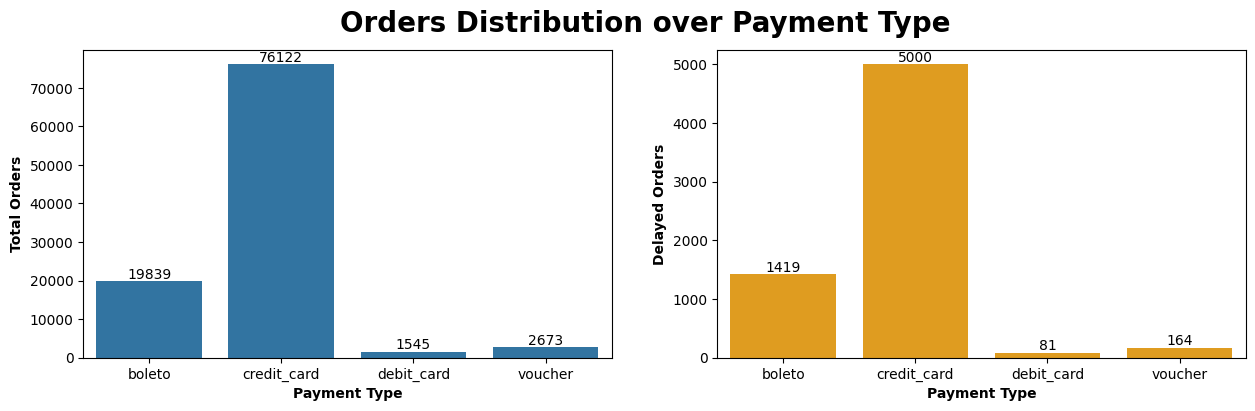

In [189]:
payment_dist=df.groupby(['payment_type']).agg(Total_orders=('order_id','count'),
                                              Delayed_orders=('delayed','sum')).reset_index()

plt.figure(figsize=(15,4))
plt.suptitle("Orders Distribution over Payment Type",fontsize=20,fontweight=700)

plt.subplot(1,2,1)
ax=sns.barplot(payment_dist,x='payment_type',y='Total_orders')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Payment Type",fontdict={'fontsize':10,'fontweight':600})
plt.ylabel("Total Orders",fontdict={'fontsize':10,'fontweight':600})

plt.subplot(1,2,2)
ax=sns.barplot(payment_dist,x='payment_type',y='Delayed_orders',color='orange')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Payment Type",fontdict={'fontsize':10,'fontweight':600})
plt.ylabel("Delayed Orders",fontdict={'fontsize':10,'fontweight':600})
plt.show()


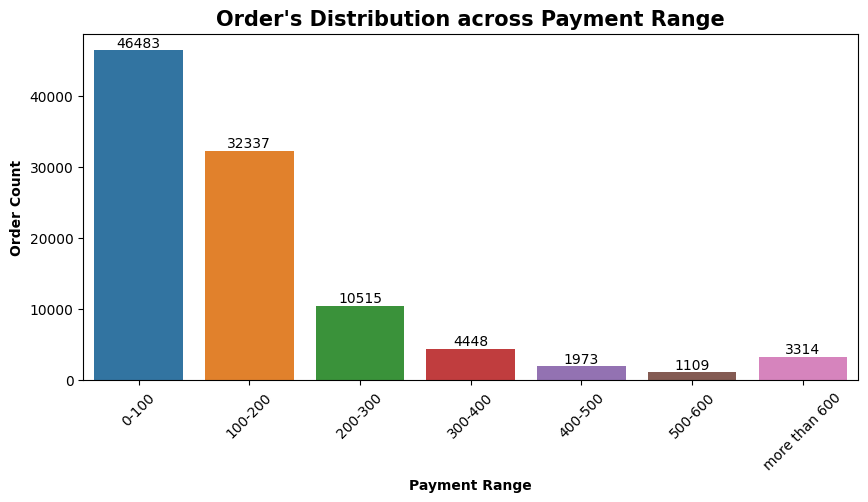

In [190]:
pay_range=df.groupby(['payment_range']).agg(order_count=('order_id','count')).reset_index()

plt.figure(figsize=(10,4.5))
plt.title("Order's Distribution across Payment Range",fontdict={'fontsize':15,'fontweight':700})
ax=sns.barplot(pay_range,x='payment_range',y='order_count',hue='payment_range')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Payment Range",fontdict={'fontsize':10,'fontweight':600})
plt.ylabel("Order Count",fontdict={'fontsize':10,'fontweight':600})
plt.xticks(rotation=45)
plt.show()

In [191]:
# let assume carrier requires atleast 3 days for successful delivery
# if Carrier got delivery after estimated delivrey to customer or 
# less than 3 days before estimated delivery date to customer
# then Seller will be responsible for the delay.
# else Carrier will be responsible for the delay.

responsible=df.apply(lambda x: 'Seller' if (x['delayed']==1 and ((x['order_delivered_carrier_date']>x['order_estimated_delivery_date']) or 
                                                                      (x['order_estimated_delivery_date']-x['order_delivered_carrier_date']).days<3))
                             else 'Carrier' if (x['delayed']==1 and x['order_delivered_carrier_date']<x['order_estimated_delivery_date'])
                             else 'no_delay',axis=1)
responsible.value_counts()

no_delay    93515
Carrier      5951
Seller        714
Name: count, dtype: int64

In [192]:
Early_or_on_time=df['delayed'].loc[df['delayed']==0].shape[0]
Delayed=df['delayed'].loc[df['delayed']==1].shape[0]

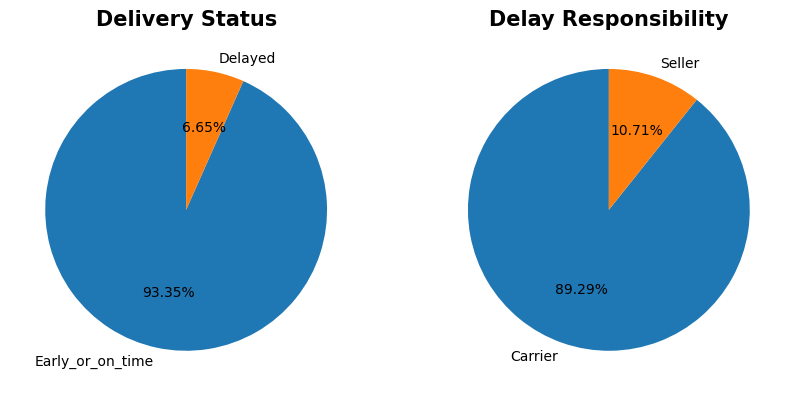

In [193]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Delivery Status",fontdict={'fontsize':15,'fontweight':600})
plt.pie([Early_or_on_time,Delayed],normalize=True,startangle=90,
        labels=['Early_or_on_time','Delayed'],autopct='%1.2f%%',)

plt.subplot(1,2,2)
plt.title("Delay Responsibility",fontdict={'fontsize':15,'fontweight':600})
plt.pie(responsible.value_counts()[1:],normalize=True,startangle=90,
        labels=['Carrier','Seller'],autopct='%1.2f%%',)
plt.show()

In [194]:
monthly_orders=df.groupby(df['order_approved_at'].dt.month_name()
                          ).agg(total_order=("order_id","count"),
                                total_delays=("delayed","sum"),
                               total_sales=('payment_value','sum'),
                               ave_sales=('payment_value','mean')).reset_index()

monthly_orders.rename(columns={'order_approved_at':"Month_name"},inplace=True)
monthly_orders=monthly_orders.iloc[[4,3,7,0,8,6,5,1,11,10,9,2]]
monthly_orders.reset_index(drop=True,inplace=True)
monthly_orders

,Month_name,total_order,total_delays,total_sales,ave_sales
0,January,8026,427,1271200.41,158.385299
1,February,8417,951,1286365.16,152.829412
2,March,9947,1502,1619448.24,162.807705
3,April,9273,462,1588020.72,171.252100
4,May,10902,583,1847537.28,169.467738
5,June,9591,167,1607961.71,167.653186
6,July,10252,303,1666432.63,162.547077
7,August,11177,538,1785536.67,159.750977
8,September,4320,189,729203.36,168.836157
9,October,4924,188,857182.62,174.082579


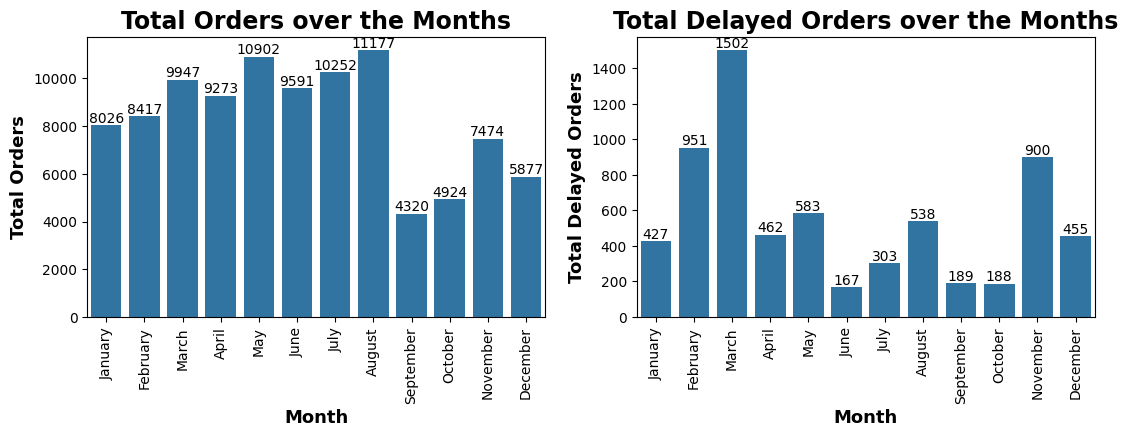

In [195]:
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
plt.title("Total Orders over the Months",fontdict={'fontsize':17,'fontweight':600})
ax=sns.barplot(data=monthly_orders,x='Month_name',y='total_order')
ax.bar_label(ax.containers[0])
plt.xlabel("Month",fontdict={'fontsize':13,'fontweight':560})
plt.ylabel("Total Orders",fontdict={'fontsize':13,'fontweight':560})
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title("Total Delayed Orders over the Months",fontdict={'fontsize':17,'fontweight':600})
ax=sns.barplot(data=monthly_orders,x='Month_name',y='total_delays')
ax.bar_label(ax.containers[0])
plt.xlabel("Month",fontdict={'fontsize':13,'fontweight':560})
plt.ylabel("Total Delayed Orders",fontdict={'fontsize':13,'fontweight':560})
plt.xticks(rotation=90)
plt.show()

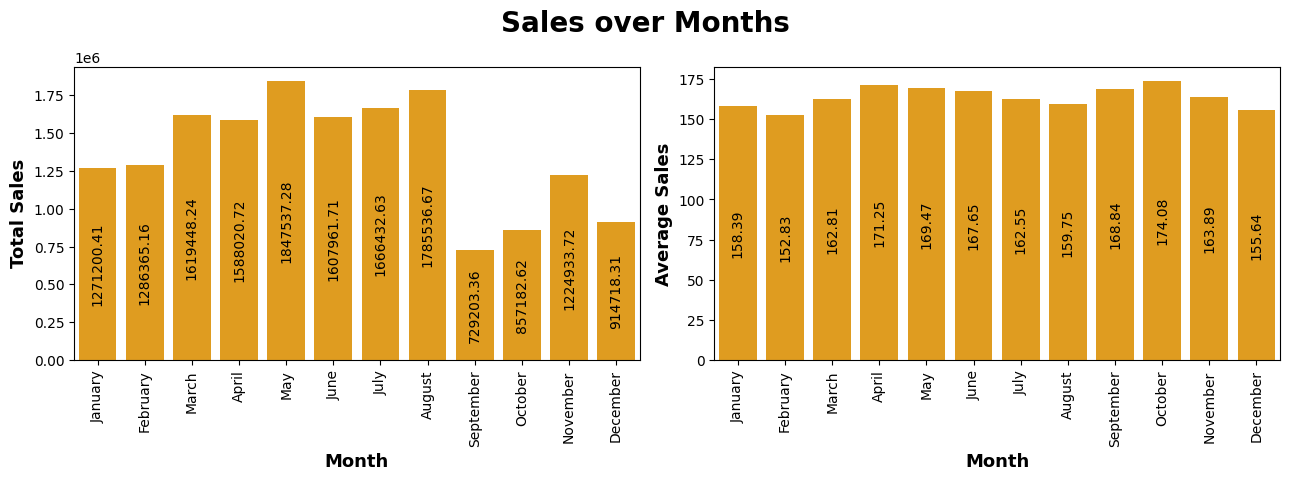

In [196]:
plt.figure(figsize=(13,8))

plt.suptitle("Sales over Months",fontsize=20,fontweight=600)

plt.subplot(2,2,1)
ax=sns.barplot(data=monthly_orders,x='Month_name',y='total_sales',color='orange')
for container in ax.containers:
    ax.bar_label(container,label_type='center',rotation=90,fmt='%0.2f')
plt.xlabel("Month",fontdict={'fontsize':13,'fontweight':560})
plt.ylabel("Total Sales",fontdict={'fontsize':13,'fontweight':560})
plt.xticks(rotation=90)

plt.subplot(2,2,2)
ax=sns.barplot(data=monthly_orders,x='Month_name',y='ave_sales',color='orange')
for container in ax.containers:
    ax.bar_label(container,label_type='center',rotation=90,fmt='%0.2f')
plt.xlabel("Month",fontdict={'fontsize':13,'fontweight':560})
plt.ylabel("Average Sales",fontdict={'fontsize':13,'fontweight':560})
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [197]:
Day_orders=df.groupby(df['order_approved_at'].dt.day_name()
                          ).agg(total_order=("order_id","count"),
                                total_delay=("delayed","sum"),
                                total_sales=('payment_value','sum'),
                                ave_sales=('payment_value','mean')).reset_index()

Day_orders.rename(columns={'order_approved_at':"Day_name"},inplace=True)
Day_orders=Day_orders.iloc[[1,5,6,4,0,2,3]]
Day_orders

,Day_name,total_order,total_delay,total_sales,ave_sales
1,Monday,13134,935,2199775.78,167.487116
5,Tuesday,19398,1290,3116287.41,160.649933
6,Wednesday,15840,1055,2581998.73,163.004970
4,Thursday,15613,949,2557309.03,163.804063
0,Friday,14766,1080,2420436.34,163.919568
2,Saturday,12324,798,2054838.54,166.734708
3,Sunday,9105,558,1467895.00,161.218561


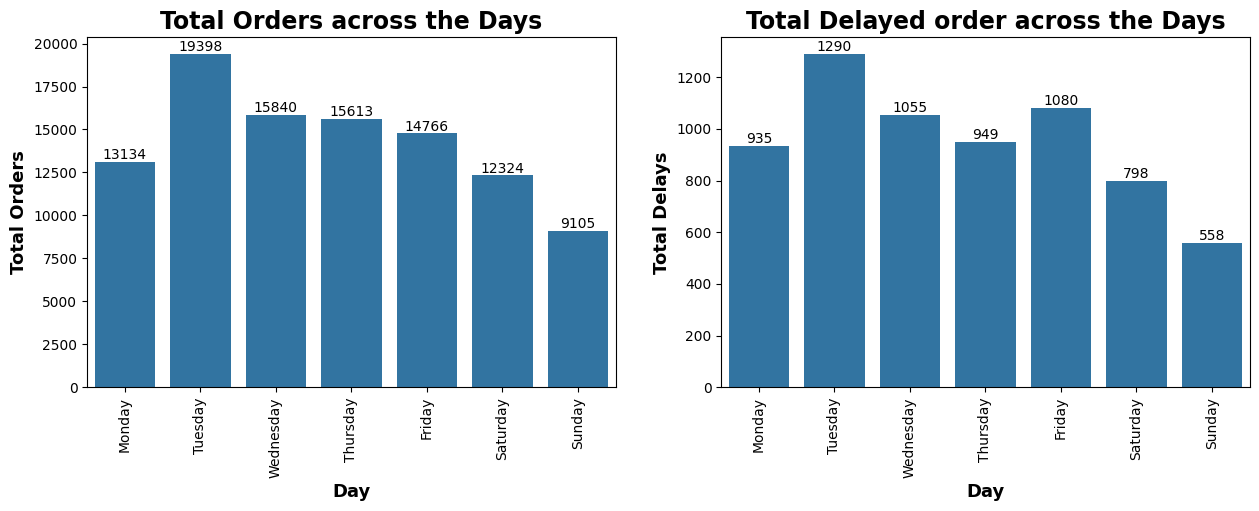

In [198]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Total Orders across the Days",fontdict={'fontsize':17,'fontweight':600})
ax=sns.barplot(data=Day_orders,x='Day_name',y='total_order')
ax.bar_label(ax.containers[0])
plt.xlabel("Day",fontdict={'fontsize':13,'fontweight':560})
plt.ylabel("Total Orders",fontdict={'fontsize':13,'fontweight':560})
plt.xticks(rotation=90)


plt.subplot(2,2,2)
plt.title("Total Delayed order across the Days",fontdict={'fontsize':17,'fontweight':600})
ax=sns.barplot(data=Day_orders,x='Day_name',y='total_delay')
ax.bar_label(ax.containers[0])
plt.xlabel("Day",fontdict={'fontsize':13,'fontweight':560})
plt.ylabel("Total Delays",fontdict={'fontsize':13,'fontweight':560})
plt.xticks(rotation=90)
plt.show()

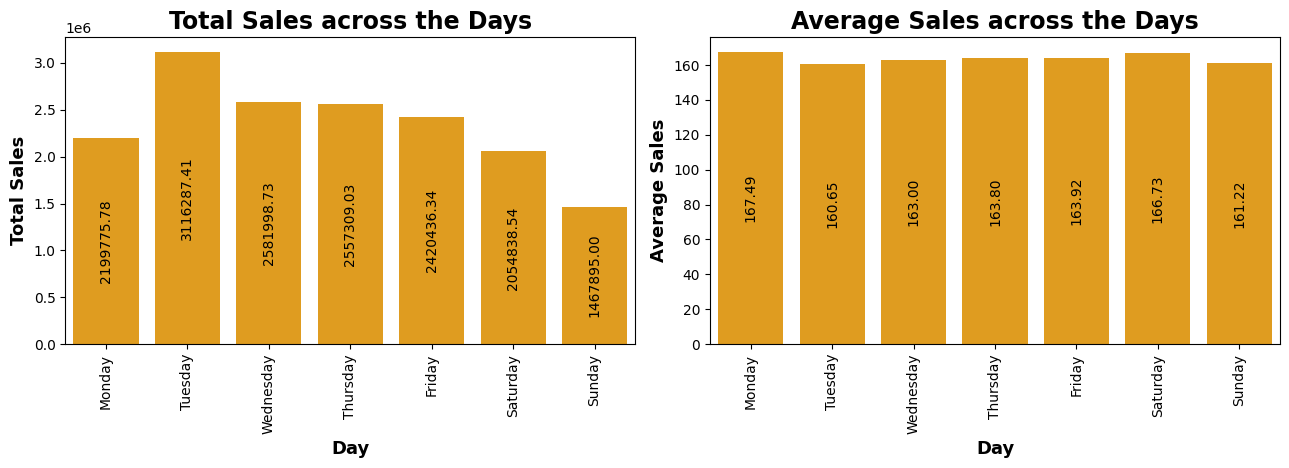

In [199]:
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
plt.title("Total Sales across the Days",fontdict={'fontsize':17,'fontweight':600})
ax=sns.barplot(data=Day_orders,x='Day_name',y='total_sales',color='orange')
for container in ax.containers:
    ax.bar_label(container,label_type='center',rotation=90,fmt='%0.2f')
plt.xlabel("Day",fontdict={'fontsize':13,'fontweight':560})
plt.ylabel("Total Sales",fontdict={'fontsize':13,'fontweight':560})
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title("Average Sales across the Days",fontdict={'fontsize':17,'fontweight':600})
ax=sns.barplot(data=Day_orders,x='Day_name',y='ave_sales',color='orange')
for container in ax.containers:
    ax.bar_label(container,label_type='center',rotation=90,fmt='%0.2f')
plt.xlabel("Day",fontdict={'fontsize':13,'fontweight':560})
plt.ylabel("Average Sales",fontdict={'fontsize':13,'fontweight':560})
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [200]:
# orders across the hours and Days
total_order=pd.pivot_table(data=df,index=df['order_approved_at'].dt.hour,
               columns=df['order_approved_at'].dt.day_name(),values='order_id',aggfunc='count')
total_order

order_approved_at,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
order_approved_at,,,,,,,
0,321,253,254,245,301,303,315
1,296,155,305,176,248,174,198
2,1711,64,1771,98,1643,189,1631
3,801,33,730,35,1003,1956,1011
4,293,22,302,25,298,2145,304
5,101,12,104,20,156,608,57
6,86,69,110,49,115,306,202
7,281,129,92,73,225,501,196
8,388,310,180,123,400,476,395


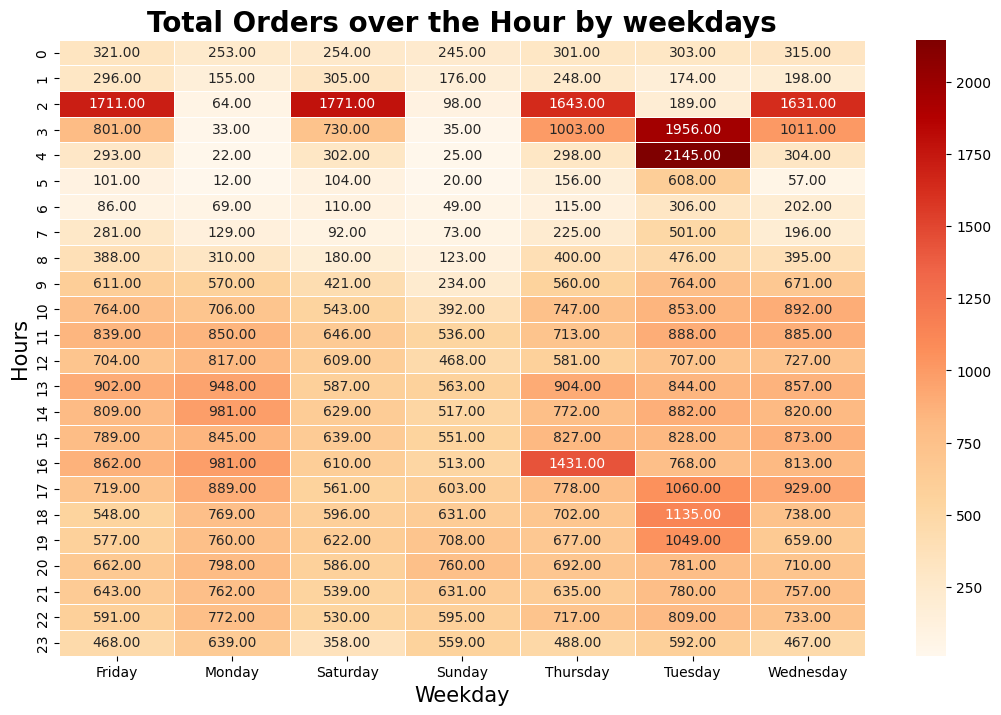

In [201]:
plt.figure(figsize=(13,8))
plt.title("Total Orders over the Hour by weekdays",fontdict={'fontsize':20,'fontweight':560})
sns.heatmap(data=total_order,annot=True,fmt='.2f',cmap="OrRd",linecolor='white',linewidths=0.5)
plt.xlabel("Weekday",fontsize=15)
plt.ylabel("Hours",fontsize=15)
plt.show()

In [202]:
avg_sale=pd.pivot_table(data=df,index=df['order_approved_at'].dt.hour,
               columns=df['order_approved_at'].dt.day_name(),values='payment_value',aggfunc='mean')
avg_sale

order_approved_at,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
order_approved_at,,,,,,,
0,163.765670,149.466047,151.889173,148.668204,146.303787,139.216436,175.567079
1,171.930000,147.145097,146.049508,160.940000,151.543589,149.011724,165.894899
2,145.529661,149.905313,144.717798,228.157245,154.630219,165.984074,156.753495
3,137.391723,148.654848,138.732342,133.987429,142.384895,142.019637,141.217903
4,179.362662,157.097273,143.657351,195.637600,175.671242,139.815748,143.454079
5,133.591782,157.865833,156.935962,145.082000,126.801987,135.437418,123.075789
6,178.991279,184.808696,191.034727,186.473265,166.503652,172.533595,190.628911
7,160.588861,187.931473,168.873261,162.749452,151.665467,176.972994,186.967908
8,178.626907,209.045419,197.549056,156.847073,175.524500,145.593256,172.172203


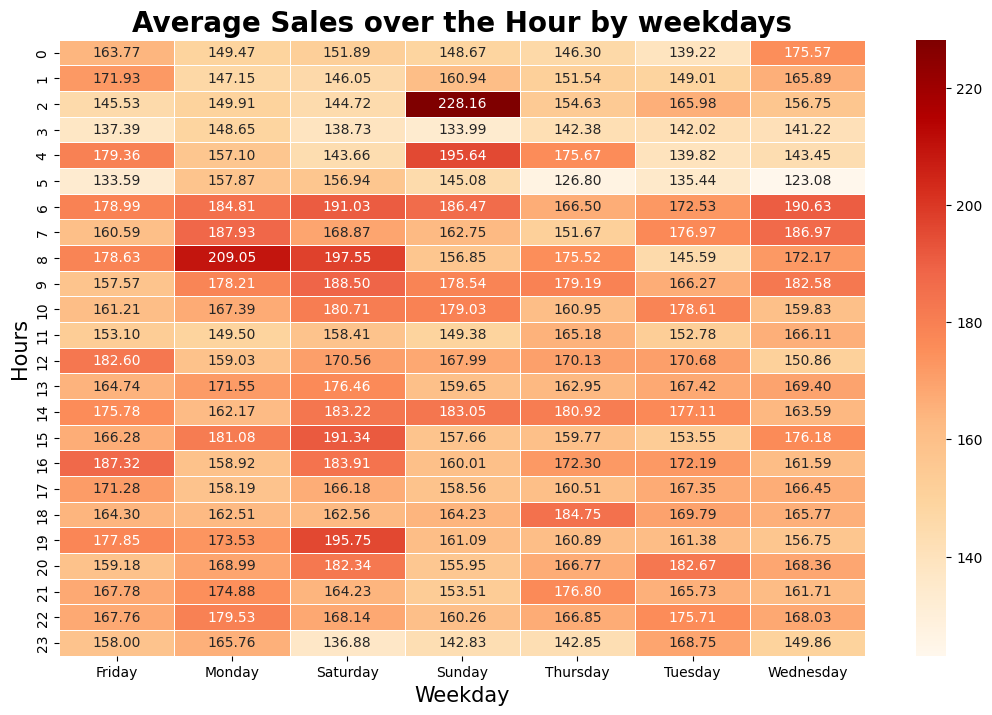

In [203]:
plt.figure(figsize=(13,8))
plt.title("Average Sales over the Hour by weekdays",fontdict={'fontsize':20,'fontweight':560})
sns.heatmap(data=avg_sale,annot=True,fmt='.2f',cmap="OrRd",linecolor='white',linewidths=0.5)
plt.xlabel("Weekday",fontsize=15)
plt.ylabel("Hours",fontsize=15)
plt.show()

In [204]:
avg_sale=pd.pivot_table(data=df,index=df['order_approved_at'].dt.hour,
               columns=df['order_approved_at'].dt.day_name(),values='payment_value',aggfunc='mean')
avg_sale

order_approved_at,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
order_approved_at,,,,,,,
0,163.765670,149.466047,151.889173,148.668204,146.303787,139.216436,175.567079
1,171.930000,147.145097,146.049508,160.940000,151.543589,149.011724,165.894899
2,145.529661,149.905313,144.717798,228.157245,154.630219,165.984074,156.753495
3,137.391723,148.654848,138.732342,133.987429,142.384895,142.019637,141.217903
4,179.362662,157.097273,143.657351,195.637600,175.671242,139.815748,143.454079
5,133.591782,157.865833,156.935962,145.082000,126.801987,135.437418,123.075789
6,178.991279,184.808696,191.034727,186.473265,166.503652,172.533595,190.628911
7,160.588861,187.931473,168.873261,162.749452,151.665467,176.972994,186.967908
8,178.626907,209.045419,197.549056,156.847073,175.524500,145.593256,172.172203


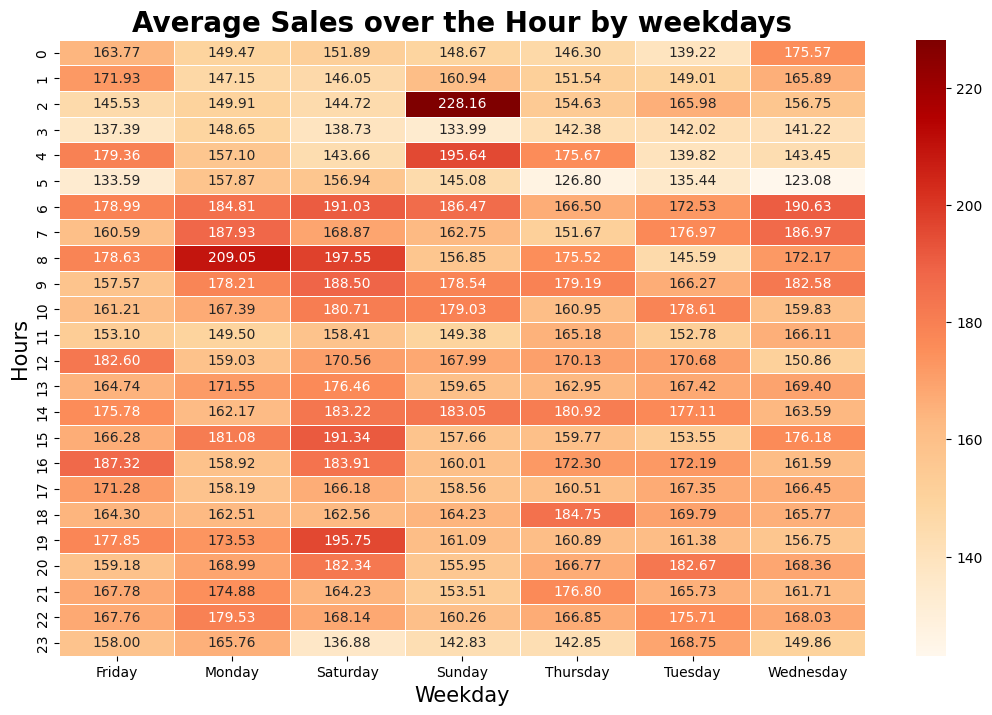

In [205]:
plt.figure(figsize=(13,8))
plt.title("Average Sales over the Hour by weekdays",fontdict={'fontsize':20,'fontweight':560})
sns.heatmap(data=avg_sale,annot=True,fmt='.2f',cmap="OrRd",linecolor='white',linewidths=0.5)
plt.xlabel("Weekday",fontsize=15)
plt.ylabel("Hours",fontsize=15)
plt.show()

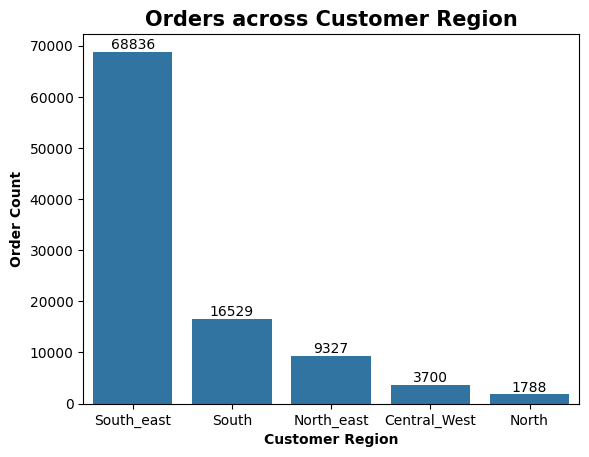

In [206]:
plt.title("Orders across Customer Region",fontdict={'fontsize':15,'fontweight':700})
ax=sns.barplot(data=df['cust_region'].value_counts())
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Customer Region",fontdict={'fontsize':10,'fontweight':600})
plt.ylabel("Order Count",fontdict={'fontsize':10,'fontweight':600})
plt.show()

In [207]:
State_delay_sumry=df.groupby(['seller_state']).agg(delayed_order=('delayed','sum'),
                                   total_order=('delayed','count')).reset_index()
State_delay_sumry['delay%']=round((State_delay_sumry['delayed_order']/State_delay_sumry['total_order'])*100,2)
State_delay_sumry

,seller_state,delayed_order,total_order,delay%
0,AM,1,3,33.33
1,BA,27,552,4.89
2,CE,6,87,6.90
3,DF,44,812,5.42
4,ES,19,315,6.03
5,GO,13,469,2.77
6,MA,75,394,19.04
7,MG,375,7927,4.73
8,MS,3,49,6.12
9,MT,5,139,3.60


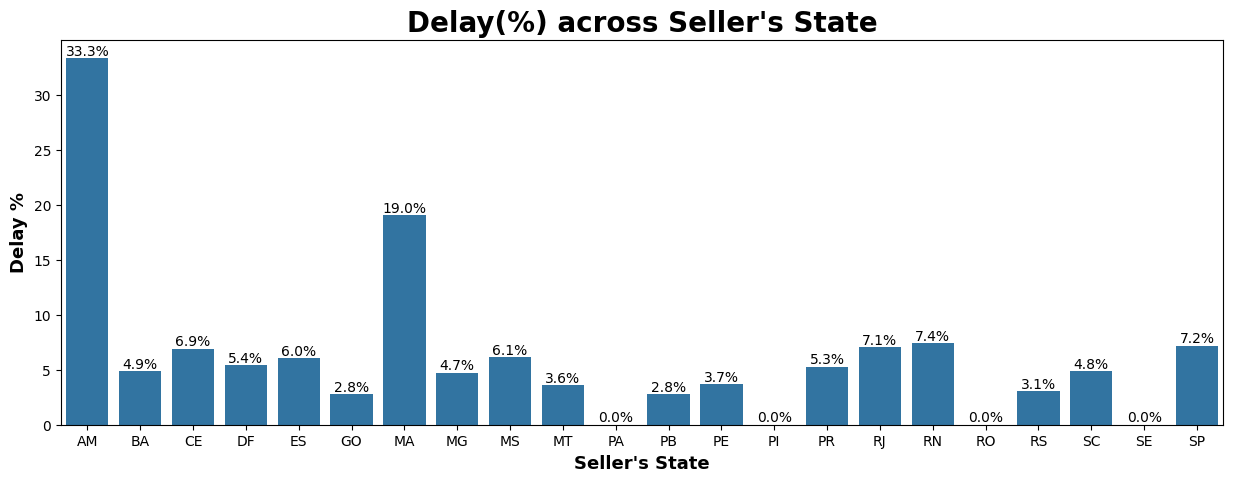

In [208]:
plt.figure(figsize=(15,5))
plt.title("Delay(%) across Seller's State",fontdict={'fontsize':20,'fontweight':700})
ax=sns.barplot(data=State_delay_sumry,x='seller_state',y='delay%')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.xlabel("Seller's State",fontdict={'fontsize':13,'fontweight':600})
plt.ylabel("Delay %",fontdict={'fontsize':13,'fontweight':600})
plt.show()

In [209]:
reg_delay=pd.pivot_table(data=df,index='cust_region',columns='seller_state',values='delayed',aggfunc='sum',fill_value=0)
reg_delay

seller_state,AM,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RS,SC,SE,SP
cust_region,,,,,,,,,,,,,,,,,,,,,,
Central_West,0,0,0,2,0,0,6,11,0,0,0,0,0,0,9,11,0,0,1,7,0,212
North,0,2,2,1,1,0,1,11,0,0,0,0,0,0,8,5,0,0,1,2,0,123
North_east,1,13,2,13,0,3,19,79,2,3,0,0,5,0,69,49,2,0,14,26,0,873
South,0,3,0,9,3,5,12,39,0,0,0,0,5,0,69,53,2,0,16,33,0,701
South_east,0,9,2,19,15,5,37,235,1,2,0,1,5,0,253,185,0,0,29,110,0,3218


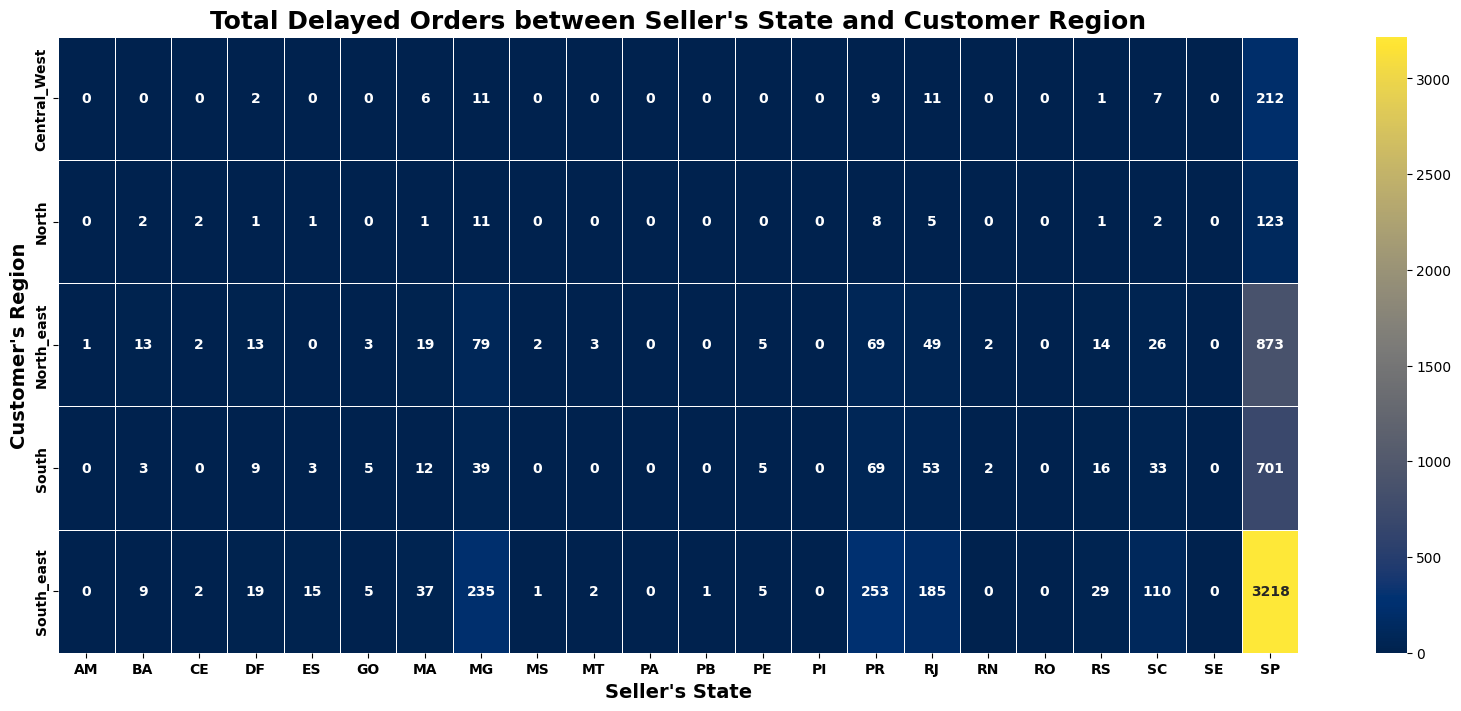

In [210]:
plt.figure(figsize=(20,8))
plt.title("Total Delayed Orders between Seller's State and Customer Region",
          fontdict={'fontsize':18,'fontweight':700})
sns.heatmap(data=reg_delay,annot=True,fmt='.0f',cmap="cividis",linecolor='white',
            linewidths=0.5,annot_kws={"weight": "bold"})
plt.xlabel("Seller's State",fontdict={'fontsize':14,'fontweight':600})
plt.xticks(fontweight=600)
plt.ylabel("Customer's Region",fontdict={'fontsize':14,'fontweight':600})
plt.yticks(fontweight=600)
plt.show()

In [211]:
prod_cat=df.groupby(['product_category_name_english']).agg(total_order=('order_id','count'),
                                                           total_delays=('delayed','sum'),
                                                         ave_rating=('review_score','mean'),
                                                         total_sales=('payment_value','sum'),
                                                         ave_price=('price','mean')).reset_index()
prod_cat

,product_category_name_english,total_order,total_delays,ave_rating,total_sales,ave_price
0,agro_industry_and_commerce,178,7,4.112360,76664.57,352.406236
1,air_conditioning,247,10,4.119342,60475.68,180.534130
2,art,195,12,4.098446,28053.65,120.493949
3,arts_and_craftmanship,24,1,4.125000,2326.17,75.583750
4,audio,348,41,3.837681,57946.76,142.853966
5,auto,3901,280,4.129572,700645.33,141.075083
6,baby,2856,226,4.092802,493224.92,137.632206
7,bed_bath_table,10008,727,3.944439,1438639.80,94.975235
8,books_general_interest,513,33,4.514735,56702.38,84.569903
9,books_imported,56,2,4.500000,6272.53,77.533214


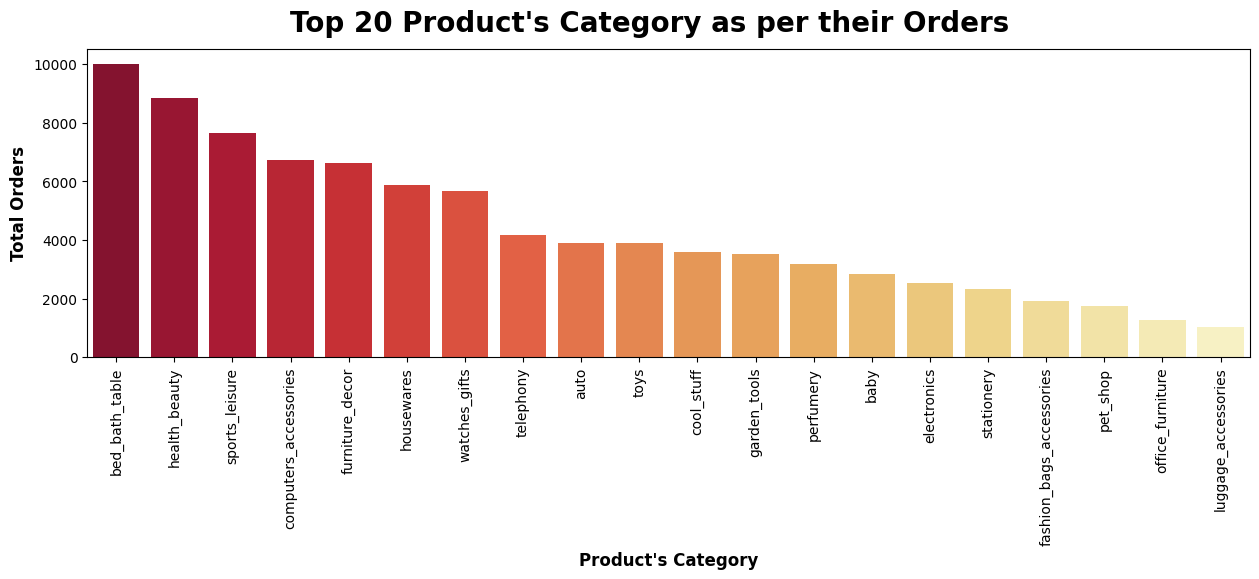

In [212]:
plt.figure(figsize=(15,4))
plt.suptitle("Top 20 Product's Category as per their Orders",fontsize=20,fontweight=750)
plt.subplot(1,1,1)
sns.barplot(data=prod_cat.sort_values('total_order',ascending=False).head(20),x='product_category_name_english',
            y='total_order',palette='YlOrRd_r')
plt.xlabel("Product's Category",fontdict={'fontsize':12,'fontweight':600})
plt.ylabel("Total Orders",fontdict={'fontsize':12,'fontweight':600})
plt.xticks(rotation=90)
plt.show()

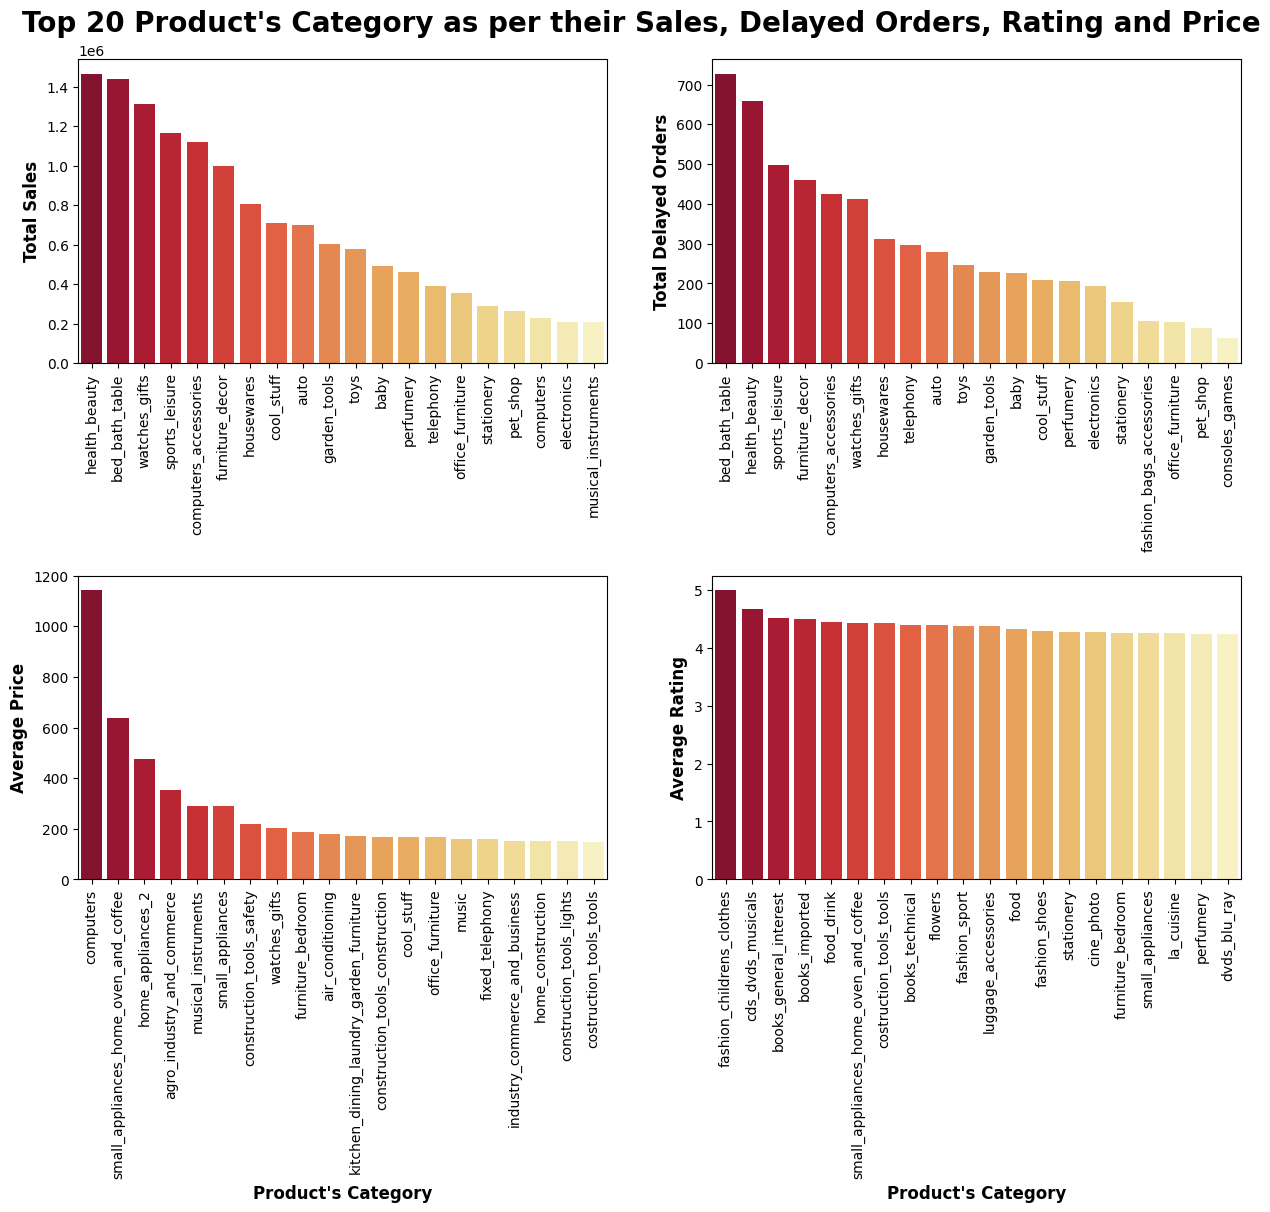

In [213]:
plt.figure(figsize=(15,10))
plt.suptitle("Top 20 Product's Category as per their Sales, Delayed Orders, Rating and Price",fontsize=20,fontweight=750)

plt.subplot(2,2,1)
sns.barplot(data=prod_cat.sort_values('total_sales',ascending=False).head(20),x='product_category_name_english',
            y='total_sales',palette='YlOrRd_r')
plt.xlabel("",fontdict={'fontsize':12,'fontweight':600})
plt.ylabel("Total Sales",fontdict={'fontsize':12,'fontweight':600})
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.barplot(data=prod_cat.sort_values('total_delays',ascending=False).head(20),x='product_category_name_english',
            y='total_delays',palette='YlOrRd_r')
plt.xlabel("",fontdict={'fontsize':12,'fontweight':600})
plt.ylabel("Total Delayed Orders",fontdict={'fontsize':12,'fontweight':600})
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.barplot(data=prod_cat.sort_values('ave_price',ascending=False).head(20),x='product_category_name_english',
            y='ave_price',palette='YlOrRd_r')
plt.xlabel("Product's Category",fontdict={'fontsize':12,'fontweight':600})
plt.ylabel("Average Price",fontdict={'fontsize':12,'fontweight':600})
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.barplot(data=prod_cat.sort_values('ave_rating',ascending=False).head(20),x='product_category_name_english',
            y='ave_rating',palette='YlOrRd_r')
plt.xlabel("Product's Category",fontdict={'fontsize':12,'fontweight':600})
plt.ylabel("Average Rating",fontdict={'fontsize':12,'fontweight':600})
plt.xticks(rotation=90)


plt.subplots_adjust(top=0.93,hspace=0.7)
plt.show()

In [214]:
from sklearn.preprocessing import LabelEncoder

In [215]:
# here we encode the seller ID due to their length
le=LabelEncoder()
df['seller_id_en']=le.fit_transform(df['seller_id'])+1

In [216]:
seller=df.groupby(['seller_id_en','seller_id']).agg(total_sales=('payment_value','sum'),
                            total_delays=('delayed','sum'),
                            rating=('review_score','mean'),
                            total_orders=('order_id','count')).reset_index()
seller

,seller_id_en,seller_id,total_sales,total_delays,rating,total_orders
0,1,0015a82c2db000af6aaaf3ae2ecb0532,2748.06,0,3.666667,3
1,2,001cca7ae9ae17fb1caed9dfb1094831,33542.30,12,4.046632,196
2,3,002100f778ceb8431b7a1020ff7ab48f,2412.64,9,4.037037,54
3,4,003554e2dce176b5555353e4f3555ac8,139.38,0,5.000000,1
4,5,004c9cd9d87a3c30c522c48c4fc07416,24530.36,10,4.147436,158
...,...,...,...,...,...,...
2965,2966,ffc470761de7d0232558ba5e786e57b7,2077.43,1,4.321429,28
2966,2967,ffdd9f82b9a447f6f8d4b91554cc7dd3,2828.66,0,4.333333,18
2967,2968,ffeee66ac5d5a62fe688b9d26f83f534,2259.55,2,4.214286,14
2968,2969,fffd5413c0700ac820c7069d66d98c89,11524.69,7,3.892857,57


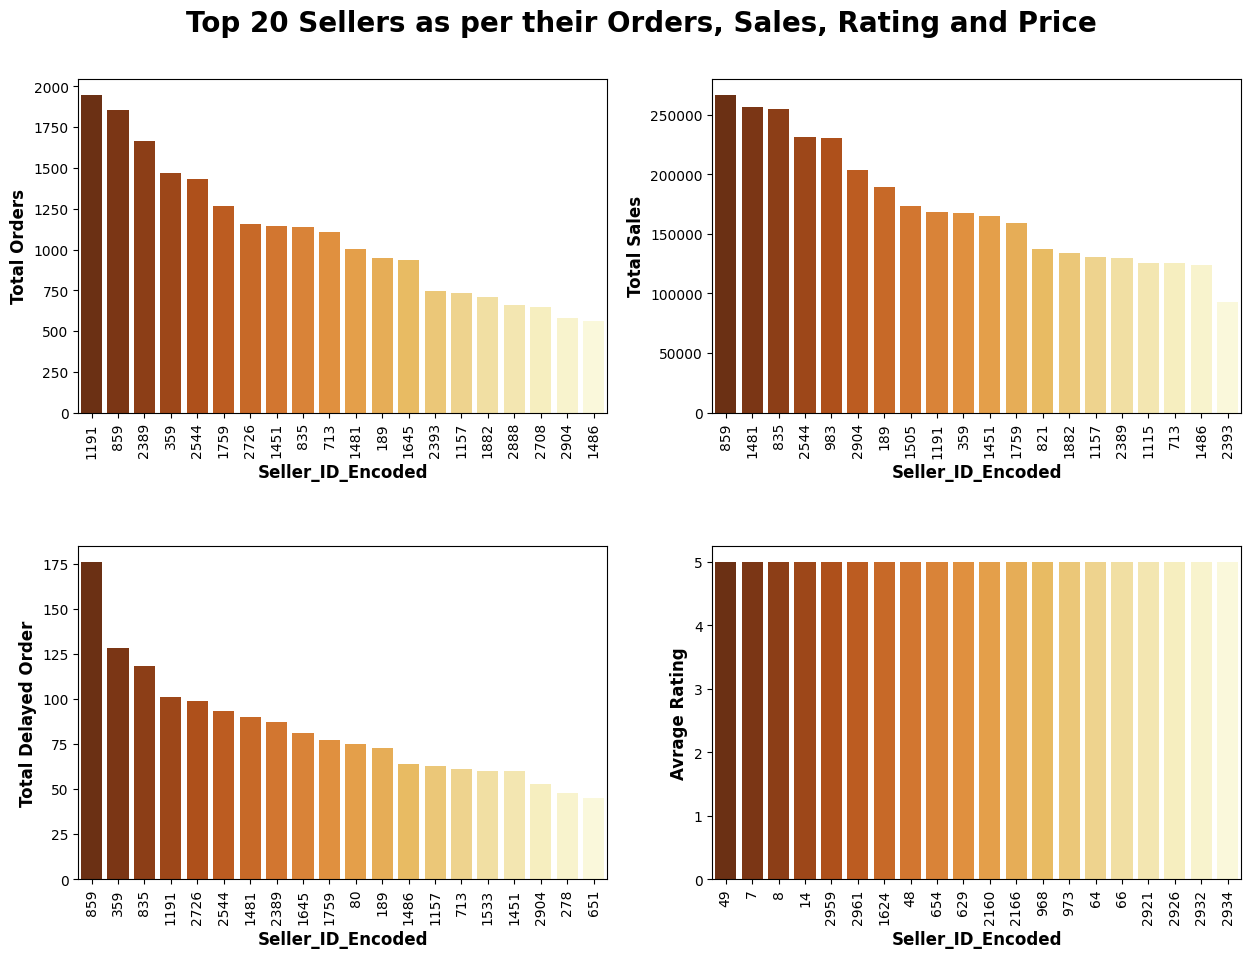

In [217]:
plt.figure(figsize=(15,10))
plt.suptitle("Top 20 Sellers as per their Orders, Sales, Rating and Price",fontsize=20,fontweight=750)

plt.subplot(2,2,1)
sns.barplot(data=seller.sort_values('total_orders',ascending=False).head(20),
            x='seller_id_en',y='total_orders',palette='YlOrBr_r',
            order=seller.sort_values('total_orders',ascending=False)['seller_id_en'].head(20))
plt.xlabel("Seller_ID_Encoded",fontdict={'fontsize':12,'fontweight':600})
plt.ylabel("Total Orders",fontdict={'fontsize':12,'fontweight':600})
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.barplot(data=seller.sort_values('total_sales',ascending=False).head(20),x='seller_id_en',
            y='total_sales',palette='YlOrBr_r',
            order=seller.sort_values('total_sales',ascending=False)['seller_id_en'].head(20))
plt.xlabel("Seller_ID_Encoded",fontdict={'fontsize':12,'fontweight':600})
plt.ylabel("Total Sales",fontdict={'fontsize':12,'fontweight':600})
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.barplot(data=seller.sort_values('total_delays',ascending=False).head(20),x='seller_id_en',
            y='total_delays',palette='YlOrBr_r',
            order=seller.sort_values('total_delays',ascending=False)['seller_id_en'].head(20))
plt.xlabel("Seller_ID_Encoded",fontdict={'fontsize':12,'fontweight':600})
plt.ylabel("Total Delayed Order",fontdict={'fontsize':12,'fontweight':600})
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.barplot(data=seller.sort_values('rating',ascending=False).head(20),x='seller_id_en',
            y='rating',palette='YlOrBr_r',
            order=seller.sort_values('rating',ascending=False)['seller_id_en'].head(20))
plt.xlabel("Seller_ID_Encoded",fontdict={'fontsize':12,'fontweight':600})
plt.ylabel("Avrage Rating",fontdict={'fontsize':12,'fontweight':600})
plt.xticks(rotation=90)


plt.subplots_adjust(top=0.91,hspace=0.4)
plt.show()

In [218]:
Day_trnd=df.loc[df['order_status']=='delivered'].set_index('order_purchase_timestamp')
Day_trnd

,order_id,product_id,product_category_name_english,review_score,seller_id,seller_state,price,freight_value,order_status,customer_id,customer_type,customer_zip_code_prefix,geo_lat,geo_long,customer_state,cust_region,payment_type,payment_value,payment_range,shipping_limit_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delay_in_days,days_taken_seller_to_carrier,estimated_days_for_delivery_by_carrier,days_taken_by_carrier,seller_id_en
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,health_beauty,1.0,ecccfa2bb93b34a3bf033cc5d1dcdc69,PR,44.99,2.83,delivered,86dc2ffce2dfff336de2f386a786e574,First-time,14600,-20.581177,-47.858931,SP,South_east,NaN,NaN,NaN,2016-09-19 23:11:33,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,1,36,53,-35,1,2752
2016-10-03 09:44:50,3b697a20d9e427646d92567910af6d57,3ae08df6bcbfe23586dd431c40bddbb7,watches_gifts,4.0,522620dcb18a6b31cd7bdf73665113a9,PR,29.90,15.56,delivered,355077684019f7f60a031656bd7262b8,First-time,4106,-23.580204,-46.629783,SP,South_east,boleto,45.46,0-100,2016-10-21 16:27:20,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,0,-1,16,3,3,959
2016-10-03 16:56:50,be5bc2f0da14d8071e2d45451ad119d9,fd7fd78fd3cbc1b0a6370a7909c0a629,sports_leisure,4.0,f09b760d23495ac9a7e00d29b769007c,SP,21.90,17.19,delivered,7ec40b22510fdbea1b08921dd39e63d8,First-time,98280,-28.295275,-53.499593,RS,South,boleto,39.09,0-100,2016-10-21 16:33:46,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,0,-11,15,16,6,2794
2016-10-03 21:13:36,a41c8759fbe7aab36ea07e038b2d4465,b72b39418216e944bb34e35f4d3ea8c7,sports_leisure,3.0,45d33f715e24d15a6ccf5c17b3a23e3c,SP,36.49,17.24,delivered,6f989332712d3222b6571b1cf5b835ce,First-time,90040,-30.043072,-51.211417,RS,South,boleto,53.73,0-100,2016-10-21 16:18:26,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,0,-26,20,34,8,817
2016-10-03 22:06:03,d207cc272675637bfed0062edffd0818,107177bf61755f05c604fe57e02467d6,furniture_decor,1.0,cca3071e3e9bb7d12640c9fbe2301306,SP,119.90,13.56,delivered,b8cf418e97ae795672d326288dfab7a7,First-time,13185,-22.904356,-47.175502,SP,South_east,credit_card,133.46,100-200,2016-10-21 16:23:06,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23,0,-23,17,32,9,2393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-29 12:25:59,52018484704db3661b98ce838612b507,777798445efd625458a90c13f3b3e6e7,toys,1.0,5f2684dab12e59f83bef73ae57724e45,SP,63.90,9.20,delivered,e450a297a7bc6839ceb0cf1a2377fa02,First-time,5863,-23.676046,-46.765741,SP,South_east,credit_card,73.10,0-100,2018-08-31 12:35:17,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03,0,-4,0,4,1,1131
2018-08-29 14:18:23,0b223d92c27432930dfe407c6aea3041,2b4472df15512a2825ae86fd9ae79335,kitchen_dining_laundry_garden_furniture,5.0,67bf6941ba2f1fa1d02c375766bc3e53,PR,209.00,46.48,delivered,e60df9449653a95af4549bbfcb18a6eb,First-time,80045,-25.425530,-49.254480,PR,South,credit_card,510.96,500-600,2018-08-31 14:30:19,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,0,-5,0,5,1,1220
2018-08-29 14:18:28,168626408cb32af0ffaf76711caae1dc,bdcf6a834e8faa30dac3886c7a58e92e,health_beauty,5.0,2a84855fd20af891be03bc5924d2b453,MG,45.90,15.39,delivered,6e353700bc7bcdf6ebc15d6de16d7002,First-time,38600,-17.211338,-46.886436,MG,South_east,voucher,61.29,0-100,2018-08-31 14:30:23,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,0,-12,0,12,0,489


In [219]:
monthly_orders=Day_trnd['order_id'].resample("M").count().reset_index()
monthly_orders.rename(columns={'order_purchase_timestamp':'Month_end','order_id':'total_orders'},inplace=True)

monthly_delays=Day_trnd['delayed'].resample("M").sum().reset_index()
monthly_delays.rename(columns={'order_purchase_timestamp':'Month_end','delayed':'total_delays'},inplace=True)

monthly_sales=Day_trnd['payment_value'].resample("M").sum().reset_index()
monthly_sales.rename(columns={'order_purchase_timestamp':'Month_end','payment_value':'total_sales'},inplace=True)

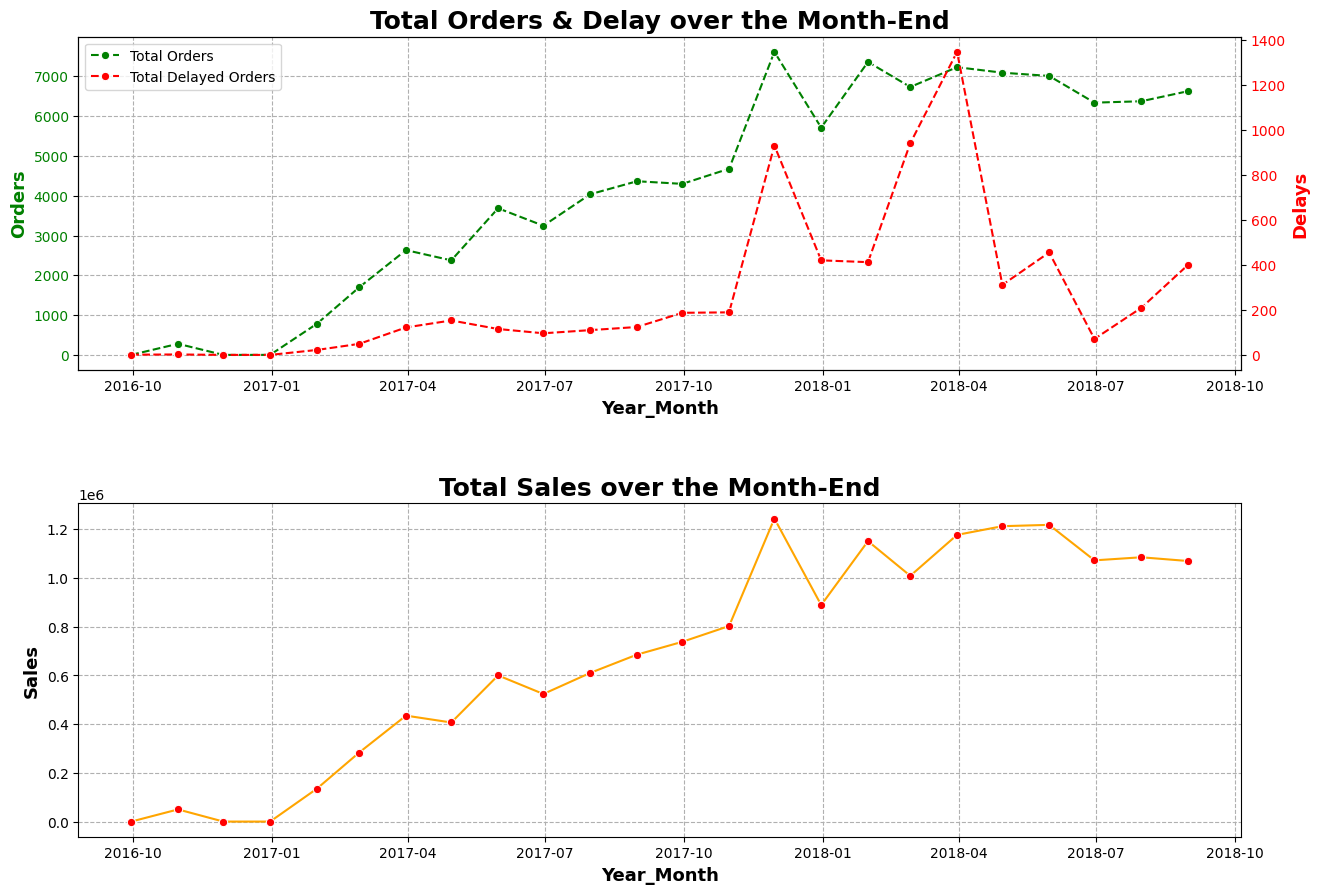

In [220]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
ax=plt.gca()
plt.title('Total Orders & Delay over the Month-End',fontdict={'fontsize':18,'fontweight':700},)
sns.lineplot(data=monthly_orders,x='Month_end',y='total_orders',color='green',
             linestyle='--',marker='o',label='Total Orders',ax=ax,legend=False)
plt.xlabel('Year_Month',fontdict={'fontsize':13,'fontweight':600})
plt.ylabel('Orders',fontdict={'fontsize':13,'fontweight':600},color='green')
plt.yticks(color='green')
plt.grid(True,linestyle='--')

ax2=ax.twinx()
sns.lineplot(data=monthly_delays,x='Month_end',y='total_delays',color='red',
             linestyle='--',marker='o',label='Total Delayed Orders',ax=ax2)
plt.xlabel('Year_Month',fontdict={'fontsize':13,'fontweight':600})
plt.ylabel('Delays',fontdict={'fontsize':13,'fontweight':600},color='red')
plt.yticks(color='red')

l1,la1=ax.get_legend_handles_labels()
l2,la2=ax2.get_legend_handles_labels()
plt.legend(l1+l2,la1+la2,loc='upper left')


plt.subplot(2,1,2)
plt.title('Total Sales over the Month-End',fontdict={'fontsize':18,'fontweight':700})
sns.lineplot(data=monthly_sales,x='Month_end',y='total_sales',color='orange',
             marker='o',markerfacecolor='red')
plt.xlabel('Year_Month',fontdict={'fontsize':13,'fontweight':600})
plt.ylabel('Sales',fontdict={'fontsize':13,'fontweight':600})
plt.grid(True,linestyle='--')


plt.subplots_adjust(top=0.91,hspace=0.4)
plt.show()

In [221]:
from scipy import stats

on_time_reviews = df.loc[df['delayed']==0 , 'review_score']
delayed_reviews = df.loc[df['delayed']==1 , 'review_score']

print(f'Average rating for Early/On-time delivery: {on_time_reviews.mean():0.5f}')
print(f'Average rating for Delayed delivery: {delayed_reviews.mean():0.5f}')
tstat, pvalue = stats.ttest_ind(on_time_reviews, delayed_reviews, equal_var=False, nan_policy='omit')
print("\nt-test Results:")
print(f't-statistic: {tstat:0.5f}')
print(f'p-value: {pvalue}\n')
if pvalue<0.05:
    print("Since pvalue is less than 0.05 hence, We reject H₀")
    print("means, there is significant difference between average review score of delayed and on-time orders")
else:
    print("Since pvalue is more than 0.05 hence, We failed to reject H₀")
    print("means, there is no difference between average review score of delayed and on-time orders")
print('-'*120)

Average rating for Early/On-time delivery: 4.25645
Average rating for Delayed delivery: 2.26638

t-test Results:
t-statistic: 100.22402
p-value: 0.0

Since pvalue is less than 0.05 hence, We reject H₀
means, there is significant difference between average review score of delayed and on-time orders
------------------------------------------------------------------------------------------------------------------------


In [222]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['payment_type'], df['delayed'])

print("Contingency Table (Observed Frequencies):")
print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)

expected_df = pd.DataFrame(expected, 
                           index=contingency.index, 
                           columns=contingency.columns)
print("\nExpected Frequencies (Under H₀):")
print(expected_df.round(0))

print("\nChi-square Test Results:")
print(f"Chi2 Statistic: {chi2:.5f}")
print(f"Degrees of Freedom:{dof}")
print(f"P-value: {p:.5f}\n")

if p<0.05:
    print("Since pvalue is less than 0.05 hence, We reject H₀")
    print("means, There is a statistically significant association between payment type and delivery delay.")
else:
    print("Since pvalue is more than 0.05 hence, We failed to reject H₀")
    print("means, No significant association between payment type and delivery delay.")
print('-'*120)

Contingency Table (Observed Frequencies):
delayed           0     1
payment_type             
boleto        18420  1419
credit_card   71122  5000
debit_card     1464    81
voucher        2509   164

Expected Frequencies (Under H₀):
delayed             0       1
payment_type                 
boleto        18519.0  1320.0
credit_card   71058.0  5064.0
debit_card     1442.0   103.0
voucher        2495.0   178.0

Chi-square Test Results:
Chi2 Statistic: 14.95262
Degrees of Freedom:3
P-value: 0.00186

Since pvalue is less than 0.05 hence, We reject H₀
means, There is a statistically significant association between payment type and delivery delay.
------------------------------------------------------------------------------------------------------------------------


In [223]:
from scipy.stats import f_oneway

df_anova = df[['customer_state', 'delay_in_days']]
days = []    
state_names = []

for state, d_days in df_anova.groupby('customer_state'):
    if len(d_days) > 5:                      
        days.append(d_days['delay_in_days'])
        state_names.append(state)

print(f"{len(days)} states included in ANOVA test.")

fstat, pval = f_oneway(*days)

print("\nOne-way ANOVA Test Results:")
print(f"F-statistic: {fstat:.4f}")
print(f"P-value: {pval:.6f}\n")

if pval < 0.05:
    print("Since pvalue is less than 0.05 hence, We reject H₀")
    print("means, There is a statistically significant difference in average delivery delay across customer states.")
else:
    print("Since pvalue is more than 0.05 hence, We failed to reject H₀")
    print("means, No significant difference in average delivery delay across customer states.")
print('-'*120)

27 states included in ANOVA test.

One-way ANOVA Test Results:
F-statistic: 57.8080
P-value: 0.000000

Since pvalue is less than 0.05 hence, We reject H₀
means, There is a statistically significant difference in average delivery delay across customer states.
------------------------------------------------------------------------------------------------------------------------


In [224]:
!pip install imbalanced-learn

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
import joblib

features = ['price', 'freight_value', 'payment_value']
cat_cols = ['payment_type', 'product_category_name_english', 'customer_state','seller_state']

x = df[features + cat_cols].copy()
y = df['delayed']

num_transform = StandardScaler()
cat_transform = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preproc = ColumnTransformer([
    ('num', num_transform, features),
    ('cat', cat_transform, cat_cols)
])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y
)

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=15,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,   # since RandomOverSampler handles imbalance
    n_jobs=-1
)

pipe = Pipeline([
    ('preprocessor', preproc),
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', xgb_model)
])

pipe.fit(x_train, y_train)

joblib.dump(pipe, "delay_prediction_model.pkl")
print("\nModel is saved.")
print("-"*120)

pred = pipe.predict(x_test)
pred_proba = pipe.predict_proba(x_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, pred))
print(f"ROC-AUC : {roc_auc_score(y_test, pred_proba):.4f}")
print(f"PR-AUC  : {average_precision_score(y_test, pred_proba):.4f}")
print(f"Train Score : {pipe.score(x_train, y_train):.4f}")
print(f"Test Score  : {pipe.score(x_test, y_test):.4f}")
print("_"*120)


Model is saved.
------------------------------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     23379
           1       0.13      0.38      0.20      1666

    accuracy                           0.79     25045
   macro avg       0.54      0.60      0.54     25045
weighted avg       0.89      0.79      0.84     25045

ROC-AUC : 0.6573
PR-AUC  : 0.1300
Train Score : 0.8586
Test Score  : 0.7935
________________________________________________________________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from xgboost import XGBClassifier
import joblib
from sklearn.impute import SimpleImputer

features = ['price', 'freight_value', 'payment_value']
cat_cols = ['payment_type', 'product_category_name_english', 'customer_state','seller_state']

x = df[features + cat_cols].copy()
y = df['delayed']

# Xử lý missing values
print("\n🔍 Xử lý missing values...")
x['product_category_name_english'] = x['product_category_name_english'].fillna('UNKNOWN')
x['payment_type'] = x['payment_type'].fillna('credit_card')

# Fill missing cho numeric features
for col in features:
    if x[col].isna().sum() > 0:
        x[col] = x[col].fillna(x[col].median())

print(f"Đã xử lý xong! Missing values còn lại: {x.isna().sum().sum()}")

# Tính scale_pos_weight tự động
scale_pos_weight = (y == 0).sum() / (y == 1).sum()
print(f"\nClass imbalance ratio: {scale_pos_weight:.2f}")
print(f"   - Class 0 (No delay): {(y == 0).sum()} ({(y == 0).sum()/len(y)*100:.2f}%)")
print(f"   - Class 1 (Delay): {(y == 1).sum()} ({(y == 1).sum()/len(y)*100:.2f}%)")

num_transform = StandardScaler()
cat_transform = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preproc = ColumnTransformer([
    ('num', num_transform, features),
    ('cat', cat_transform, cat_cols)
])

imputer = SimpleImputer(strategy='median', missing_values=np.nan)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y
)

xgb_improved = XGBClassifier(
    n_estimators=300,              # Giảm từ 500 để tránh overfitting
    learning_rate=0.05,            # Tăng từ 0.01 để học nhanh hơn
    max_depth=8,                   # Giảm từ 15 để tránh overfitting
    min_child_weight=3,            # Thêm để tránh overfitting
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    reg_alpha=0.1,                 # L1 regularization
    reg_lambda=1.0,                # L2 regularization
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

# Pipeline với Imputer trước SMOTE (SMOTE không chấp nhận NaN)
pipe_improved = Pipeline([
    ('preprocessor', preproc),
    ('imputer', imputer),  # Xử lý missing values trước SMOTE
    ('oversample', SMOTE(random_state=42, k_neighbors=5)),  # SMOTE tốt hơn RandomOverSampler
    ('model', xgb_improved)
])



pipe.fit(x_train, y_train)

joblib.dump(pipe, "delay_prediction_model.pkl")
print("\nModel is saved.")
print("-"*120)

pred = pipe.predict(x_test)
pred_proba = pipe.predict_proba(x_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, pred))
print(f"ROC-AUC : {roc_auc_score(y_test, pred_proba):.4f}")
print(f"PR-AUC  : {average_precision_score(y_test, pred_proba):.4f}")
print(f"Train Score : {pipe.score(x_train, y_train):.4f}")
print(f"Test Score  : {pipe.score(x_test, y_test):.4f}")
print("_"*120)


🔍 Xử lý missing values...
   ✅ Đã xử lý xong! Missing values còn lại: 0

⚖️  Class imbalance ratio: 14.03
   - Class 0 (No delay): 93515 (93.35%)
   - Class 1 (Delay): 6665 (6.65%)

Model is saved.
------------------------------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     23379
           1       0.13      0.38      0.20      1666

    accuracy                           0.80     25045
   macro avg       0.54      0.60      0.54     25045
weighted avg       0.89      0.80      0.84     25045

ROC-AUC : 0.6575
PR-AUC  : 0.1296
Train Score : 0.8591
Test Score  : 0.7959
________________________________________________________________________________________________________________________


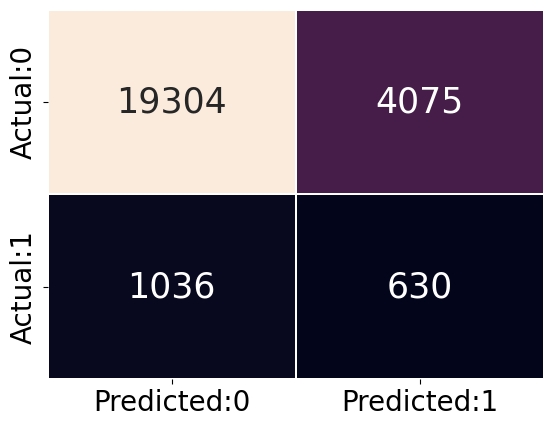

In [227]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()